<a href="https://colab.research.google.com/github/kyulee-jeon/Tutorial/blob/main/Week10_(2)CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Loading

In [ ]:
#Connection to GoogleDrive 
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os
from glob import glob
import numpy as np
import cv2
import pickle
from PIL import Image

In [ ]:
data_path = "/content/gdrive/MyDrive/Colab Notebooks/2022MedicalMachineLearning/data/COVID-19_Radiography_Dataset"
"""
#Define the file paths
all_covid_paths = [f for f in glob(os.path.join(data_path, 'COVID', 'images', 'COVID*.png'))]
#all_opac_paths = [f for f in glob(os.path.join(data_path, 'Lung_Opacity', 'images', 'Lung_Opacity*.png'))]
all_normal_paths = [f for f in glob(os.path.join(data_path, 'Normal', 'images', 'Normal*.png'))]
# all_data_paths = all_covid_paths + all_opac_paths + all_normal_paths
"""

"\n#Define the file paths\nall_covid_paths = [f for f in glob(os.path.join(data_path, 'COVID', 'images', 'COVID*.png'))]\n#all_opac_paths = [f for f in glob(os.path.join(data_path, 'Lung_Opacity', 'images', 'Lung_Opacity*.png'))]\nall_normal_paths = [f for f in glob(os.path.join(data_path, 'Normal', 'images', 'Normal*.png'))]\n# all_data_paths = all_covid_paths + all_opac_paths + all_normal_paths\n"

In [ ]:
"""
list_x = []
list_y = []

#load the images
for filepath in all_normal_paths[:5000]: #only upto 5000 cases due to limited resources
  i = len(list_x)
  list_x.append(cv2.imread(filepath,0))
  #list_x.append(Image.open(filepath).convert('RGB')) #covert to RGB
  if(len(list_x)==i+1): #add label only when the data is loaded
    list_y.append(0) #label normal

for filepath in all_covid_paths:
  i = len(list_x)
  list_x.append(cv2.imread(filepath,0))
  #list_x.append(Image.open(filepath).convert('RGB'))
  if(len(list_x)==i+1): #add label only when the data is loaded
    list_y.append(1) #label covid

#save the list
with open(os.path.join(data_path, "list_x_wk10"), "wb") as f:
  pickle.dump(list_x, f)
with open(os.path.join(data_path, "list_y_wk10"), "wb") as f:
  pickle.dump(list_y, f)
"""

'\nlist_x = []\nlist_y = []\n\n#load the images\nfor filepath in all_normal_paths[:5000]: #only upto 5000 cases due to limited resources\n  i = len(list_x)\n  list_x.append(cv2.imread(filepath,0))\n  #list_x.append(Image.open(filepath).convert(\'RGB\')) #covert to RGB\n  if(len(list_x)==i+1): #add label only when the data is loaded\n    list_y.append(0) #label normal\n\nfor filepath in all_covid_paths:\n  i = len(list_x)\n  list_x.append(cv2.imread(filepath,0))\n  #list_x.append(Image.open(filepath).convert(\'RGB\'))\n  if(len(list_x)==i+1): #add label only when the data is loaded\n    list_y.append(1) #label covid\n\n#save the list\nwith open(os.path.join(data_path, "list_x_wk10"), "wb") as f:\n  pickle.dump(list_x, f)\nwith open(os.path.join(data_path, "list_y_wk10"), "wb") as f:\n  pickle.dump(list_y, f)\n'

In [ ]:
#load the list
with open(os.path.join(data_path, "list_x_wk10"), "rb") as f:
  list_x = pickle.load(f)
with open(os.path.join(data_path, "list_y_wk10"), "rb") as f:
  list_y = pickle.load(f)
#list_y = list(map(lambda x: x.replace('0', 'c'), list_y))
#list_y = list(map(lambda x: x.replace('1', 't'), list_y))

In [ ]:
print("The length of list_x is {}".format(len(list_x)))
print("The length of list_y is {}".format(len(list_y)))
print("The shape of first element of list_x is {}".format(list_x[0].shape))

The length of list_x is 8616
The length of list_y is 8616
The shape of first element of list_x is (299, 299)


In [ ]:
#convert to ndarray of the data
data_x = np.array(list_x, dtype = np.float32)
data_y = np.array(list_y)

In [ ]:
#Check the class balance
import pandas as pd
pd.Series(data_y).value_counts()

0    5000
1    3616
dtype: int64

In [ ]:
data_x = data_x/255.0
#one hot encoding
data_y_ = data_y.reshape(-1,1)

from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False)
ohe.fit(data_y_)
data_y = ohe.transform(data_y_)

Data Preprocessing

In [ ]:
# add a dimension for channel
data_x = np.expand_dims(data_x, axis = 1)

In [ ]:
data_x.shape

(8616, 1, 299, 299)

In [ ]:
# split into train test sets (stratified)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.20, random_state=10, stratify=data_y)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(6892, 1, 299, 299)
(1724, 1, 299, 299)
(6892, 2)
(1724, 2)


In [ ]:
import torch

#convert ndarray(numpy) to tensor(torch)
x_train = torch.Tensor(x_train)
x_test = torch.Tensor(x_test)
y_train = torch.Tensor(y_train)
y_test = torch.Tensor(y_test)

#combining train and test set in tensor dataset of torch
ds_train = torch.utils.data.TensorDataset(x_train, y_train)
ds_test = torch.utils.data.TensorDataset(x_test, y_test)

**Defining the model**

In [ ]:
use_cuda = torch.cuda.is_available()
device = torch.device('cuda' if use_cuda else 'cpu')

In [ ]:
device

device(type='cuda')

In [ ]:
output_dim = 2
input_dim = 89401#89401= 299*299

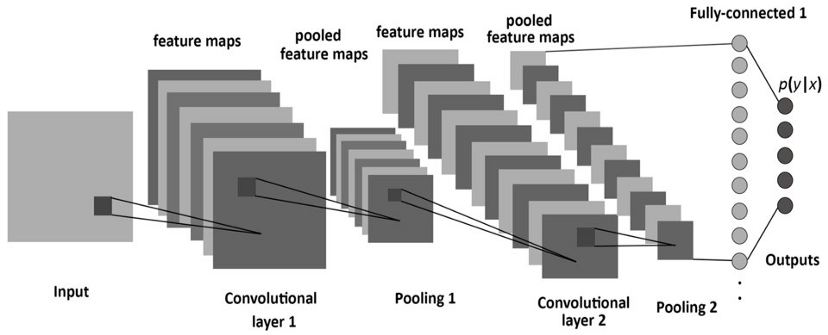

In [ ]:
from torch import nn
import torch.nn.functional as F
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(in_channels = 1, out_channels = 5, kernel_size = 8, stride = 1) #299*299*1 -> 296*296*5
        self.conv2 = nn.Conv2d(5, 10, kernel_size = 5) #296*296*10
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(640, 20)
        self.fc2 = nn.Linear(20, output_dim)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 8)) #299*299*1 -> 292*292*5 -> 36*36*5
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)),4)) #36*36*5 -> 32*32*10 -> 8*8*10
        x = x.view(-1, 640)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return x

In [ ]:
"""
W = 299 #no. of dimension
K = 5 #kernel
P = 0 #padding
S = 1 #stride
M = 2 max pooling

W = ((W - K + 2*P)/S)+1
W = W/M #after max pooling
"""

'\nW = 299 #no. of dimension\nK = 5 #kernel\nP = 0 #padding\nS = 1 #stride\nM = 2 max pooling\n\nW = ((W - K + 2*P)/S)+1\nW = W/M #after max pooling\n'

In [ ]:
model = Net().to(device)

In [ ]:
from torchsummary import summary
summary(model, input_size = (1, 299, 299))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1          [-1, 5, 292, 292]             325
            Conv2d-2           [-1, 10, 32, 32]           1,260
         Dropout2d-3           [-1, 10, 32, 32]               0
            Linear-4                   [-1, 20]          12,820
            Linear-5                    [-1, 2]              42
Total params: 14,447
Trainable params: 14,447
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.34
Forward/backward pass size (MB): 3.41
Params size (MB): 0.06
Estimated Total Size (MB): 3.81
----------------------------------------------------------------


**4. Configuration of Training**

In [ ]:
batch_size = 128
epochs = 100
learning_rate = 0.01

In [ ]:
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [ ]:
train_loader = torch.utils.data.DataLoader(
    dataset = ds_train,
    batch_size = batch_size,
    shuffle = True
)
test_loader = torch.utils.data.DataLoader(
    dataset = ds_test,
    batch_size = batch_size,
    shuffle = True
)


In [ ]:
"""
dataiter = iter(train_loader)
images, labels = next(dataiter)
images.shape
images[0,:,:]
"""

'\ndataiter = iter(train_loader)\nimages, labels = next(dataiter)\nimages.shape\nimages[0,:,:]\n'

In [ ]:
def train(model, train_loader, optimizer):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        # 학습 데이터를 DEVICE의 메모리로 보냄
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = F.cross_entropy(output, target)
        loss.backward()
        optimizer.step()

In [ ]:
def evaluate(model, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)

            # sum of all loss values
            test_loss += F.cross_entropy(output, target,reduction='sum').item()
            
            # the class with the maximal value is the predicted value
            pred = output.max(1, keepdim=True)[1]
            target_label = target.max(1, keepdim=True)[1]
            correct += (target_label==pred).sum().item()
            
    test_loss /= len(test_loader.dataset)
    test_accuracy = 100. * correct / len(test_loader.dataset)
    return test_loss, test_accuracy

**5. Fitting the model**

In [ ]:
for epoch in range(1, epochs):
  train(model, train_loader, optimizer)
  test_loss, test_accuracy = evaluate(model, test_loader)

  print('[{}] Test Loss: {:.4f}, Accuracy: {:.2f}%'. format(epoch, test_loss, test_accuracy))

[1] Test Loss: 0.6809, Accuracy: 58.00%
[2] Test Loss: 0.6793, Accuracy: 58.00%
[3] Test Loss: 0.6782, Accuracy: 58.00%
[4] Test Loss: 0.6770, Accuracy: 58.00%
[5] Test Loss: 0.6758, Accuracy: 58.00%
[6] Test Loss: 0.6745, Accuracy: 58.00%
[7] Test Loss: 0.6732, Accuracy: 58.00%
[8] Test Loss: 0.6715, Accuracy: 58.00%
[9] Test Loss: 0.6694, Accuracy: 58.00%
[10] Test Loss: 0.6669, Accuracy: 58.00%
[11] Test Loss: 0.6626, Accuracy: 58.00%
[12] Test Loss: 0.6567, Accuracy: 58.00%
[13] Test Loss: 0.6483, Accuracy: 58.00%
[14] Test Loss: 0.6381, Accuracy: 58.00%
[15] Test Loss: 0.6298, Accuracy: 59.92%
[16] Test Loss: 0.6188, Accuracy: 59.86%
[17] Test Loss: 0.6111, Accuracy: 65.78%
[18] Test Loss: 0.6001, Accuracy: 70.71%
[19] Test Loss: 0.5948, Accuracy: 70.59%
[20] Test Loss: 0.6008, Accuracy: 61.02%
[21] Test Loss: 0.5898, Accuracy: 71.00%
[22] Test Loss: 0.5867, Accuracy: 72.51%
[23] Test Loss: 0.5842, Accuracy: 63.46%
[24] Test Loss: 0.5786, Accuracy: 70.30%
[25] Test Loss: 0.5644, A

In [ ]:
torch.save(model.state_dict(), os.path.join(data_path, "wk10_my_CNN.pth"))

In [ ]:
"""test_iter = iter(test_loader)
data, target = next(test_iter)
data, target = data.to(device), target.to(device)
"""


'test_iter = iter(test_loader)\ndata, target = next(test_iter)\ndata, target = data.to(device), target.to(device)\n'

In [ ]:
"""
model.train()
optimizer.zero_grad() 
train_output = model(x_train)
train_loss = F.cross_entropy(train_output, y_train)
"""
"""
for epoch in range(epochs):
  model.train()
  optimizer.zero_grad() #기존의 경사값을 잊고 새로 시작하기 위해 경사값을 0으로
  train_output = model(x_train)
  train_loss = criterion(train_output, y_train)
  if epoch % 100 == 0:
    print('Train loss at {} is {}'.format(epoch, train_loss.item()))
  train_loss.backward() #미분
  optimizer.step() #loss*learning rate 만큼 이동 (역전파)
"""

"\nfor epoch in range(epochs):\n  model.train()\n  optimizer.zero_grad() #기존의 경사값을 잊고 새로 시작하기 위해 경사값을 0으로\n  train_output = model(x_train)\n  train_loss = criterion(train_output, y_train)\n  if epoch % 100 == 0:\n    print('Train loss at {} is {}'.format(epoch, train_loss.item()))\n  train_loss.backward() #미분\n  optimizer.step() #loss*learning rate 만큼 이동 (역전파)\n"